Support algs imported!


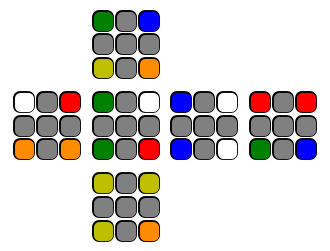

Cube initiated
Gripbased alg genning initiated
--- Initiating alg genning up to length 6 ---
Parameters:
  - mode = 2
  - start_grips = 1
  - skip_U = True
  - prnt = False
--- Initiating search alg genning up to length 3. Previous algs cannot be reused if we want to follow the table ---
--- Done generating algs ---
  - Total time spent: 5.17 seconds.
  - Alg count: 0.
--- Initiating alg categorization ---
--- Done categorizing algs ---
--- Statistics ---
  - Average alg length: 0.00 (0.00 variance)
  - Best case: 100 moves
  - Worst case: 0 moves
Further processing may be necessary.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit
import time
import random

%run gripbased.ipynb
full_algs = gen_full_algs(length=6, mode=2, move_transition=move_transition, start_grips=np.array([1]), skip_U=True, prnt=False, categorize=True, categorize_mode=0, return_full_alg_list=True)

In [2]:
triggers = {
    "R U ": "K ",
    "R U' ": "K' ",
    "R U2 ": "K2 ",
    "R' U ": "Ki ",
    "R' U' ": "Ki' ",
    "R' U2 ": "Ki2 ",
    "R2 U ": "Ko ",
    "R2 U' ": "Ko' ",
    "R2 U2 ": "Ko2 ",
    "R U R' ": "P ",
    "R U' R' ": "P' ",
    "R U2 R' ": "P2 ",
    "R' U R ": "Pi ",
    "R' U' R " : "Pi' ",
    "R' U2 R ": "Pi2 ",
    "R2 U R2 ": "Po ",
    "R2 U' R2 ": "Po' ",
    "R2 U2 R2 ": "Po2 ",
    "R U R' U' ": "T ",
    "R U' R' U ": "T' ",
    "R U2 R' U2 ": "T2 ",
    "R' U R U' ": "Ti ",
    "R' U' R U ": "Ti' ",
    "R' U2 R U2 ": "Ti2 ",
    "R2 U R2 U' ": "To ",
    "R2 U' R2 U ": "To' ",
    "R2 U2 R2 U2 ": "To2 ",
}

triggers_ = {
    "R U R' ": "T ",
    "R U' R' ": "D ",
    "R U2 R' ": "ST ",
    "R' U R ": "F ",
    "R' U' R ": "V ",
    "R' U2 R ": "FR ",
    "R U R ": "K ",
    "R U' R ": "G ",
    "R U2 R ": "SK ",
    "R' U R' ": "S ",
    "R' U' R' ": "Z ",
    "R' U2 R' ": "W ",
    "R U R2 ": "M ",
    "R U' R2 ": "N ",
    "R U2 R2 ": "SN ",
    "R' U R2 ": "CR ",
    "R' U' R2 ": "PR ",
    "R' U2 R2 ": "TR ",
    "R2 U R ": "L ",
    "R2 U' R ": "R ",
    "R2 U2 R ": "SL ",
    "R2 U R' ": "J ",
    "R2 U' R' ": "CH ",
    "R2 U2 R' ": "SH ",
    "R2 U R2 ": "B ",
    "R2 U' R2 ": "P ",
    "R2 U2 R2 ": "TH ",
    "U ": "A ",
    "U' ": "I ",
    "U2 ": "O ",
}

def shorten_alg(alg, triggers, prnt = False):
    alg = alg + " "
    keys = list(triggers.keys())
    keys.sort(key=lambda x: len(x.strip().split(" ")), reverse=True)
    # start with length len(alg)
    L = len(alg.split(" "))
    while L > 0:
        for i in range(len(alg.split(" ")) - L + 1):
            key = " ".join(alg.split(" ")[i:i+L]) + " "
            if key in triggers:
                # replace the alg with the trigger, but only the first occurence
                alg = alg.replace(key, triggers[key], 1)
                return shorten_alg(alg, triggers, prnt)
        L -= 1

    return alg.strip()

alg = "R' U' R U' R U R U' R' U R U R2 U' R'" # Should transform into "V I K I F A CH"
shorten_alg(alg, triggers, prnt=False)

"Pi' U' K T' K Ko' R'"

In [3]:
move_transition_RU = np.array([ 
#   [ 0, 1, 2, 3, 4, 5, 6, 7, 8, 9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44],
    [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#   [ R,R2,R', L,L2,L', r,r2,r', l,l2,l', M,M2,M', U,U2,U', D,D2,D', u,u2,u', d,d2,d', E,E2,E', F,F2,F', B,B2,B', f,f2,f', b,b2,b', S,S2,S'],
    [ 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
])

In [4]:
move_transition_EODF = np.array([ 
#   [ 0, 1, 2, 3, 4, 5, 6, 7, 8, 9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44],
    [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#   [ R,R2,R', L,L2,L', r,r2,r', l,l2,l', M,M2,M', U,U2,U', D,D2,D', u,u2,u', d,d2,d', E,E2,E', F,F2,F', B,B2,B', f,f2,f', b,b2,b', S,S2,S'],
    [ 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1], 
])

length = 10
mode = "EODF" # to get EODF solutions
start_grips = np.array([1])
skip_U = True
prnt = True
categorize = True
categorize_mode = "ZBLS"
return_full_alg_list = False

EODF = gen_full_algs(length=length, mode=mode, move_transition=move_transition_EODF, start_grips=start_grips, skip_U=skip_U, prnt=prnt, categorize=categorize, categorize_mode=categorize_mode, return_full_alg_list=return_full_alg_list)

--- Initiating alg genning up to length 10 ---
Parameters:
  - mode = EODF
  - start_grips = 1
  - skip_U = True
  - prnt = True
Genning search algs...
Algs of length 1 genned. Time spent: 0.00s...
Algs of length 2 genned. Time spent: 0.00s...
Algs of length 3 genned. Time spent: 0.00s...
Algs of length 4 genned. Time spent: 0.00s...
Algs of length 5 genned. Time spent: 0.01s...
Done genning algs. Making into np array. Time spent: 0.01s
Genning table based on 66653 algs...
6665 (10.00%) algs added in 0.08 seconds...
13330 (20.00%) algs added in 0.15 seconds...
19995 (30.00%) algs added in 0.25 seconds...
26660 (40.00%) algs added in 0.36 seconds...
33325 (50.00%) algs added in 0.46 seconds...
39990 (60.00%) algs added in 0.55 seconds...
46655 (70.00%) algs added in 0.64 seconds...
53320 (80.00%) algs added in 0.75 seconds...
59985 (90.00%) algs added in 0.85 seconds...
66650 (100.00%) algs added in 0.96 seconds...
Table generated in 0.96 seconds. Size: 28557 consisting of 50197 algs
Ge

In [5]:
keys = list(EODF.keys())
k = -1
mode = "ZBLS"

Scramble: M' U2 M r r U R' U' r' U2 R U R U' R2 U2 R r' U U R U R' U r U R' U' r' U2 R U R U' R2 U2 R U' R U' R' U' U'


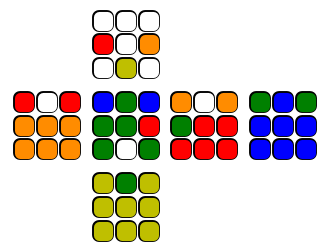

In [53]:
# function to find alg from scramble
def find_key(scramble, mode, cateorized_algs):
    cube = Cube(mode)
    cube.apply_moves(scramble)
    for u in ["", "U", "U2", "U'"]:
        cube.apply_moves(u)
        ID = id_from_state(cube.state)
        if ID in cateorized_algs:
            for i, alg in enumerate(cateorized_algs[ID]):
                print(f"{i+1}. {alg}")
            return ID
        cube.apply_moves(inverse_alg(u))

flip = "r U R' U' r' U2 R U R U' R2 U2 R"
flip2 = "U R U R' U " + flip + " U' R U' R' U'"

scramble = "M' U2 M "
scramble += "r " + flip + " r' U " + flip2 + " U'"

print("Scramble:", scramble)
mode = 19
cube = Cube(mode)
cube.apply_moves(scramble)
cube.plot()

find_key(scramble, mode, EOLC)

In [65]:
k += 1
key = keys[k]
print(f"{k}, ({key})")
alg0 = EODF[key][0]
# remove (), not the AUF itself
alg0 = alg0.replace("(", "").replace(")", "")
cube = Cube(mode)
cube.apply_moves(inverse_alg(alg0))
cube.plot()

for i, alg in enumerate(EODF[key][:25]):
    print(f"{i+1}. {alg}")

IndexError: list index out of range

In [ ]:
# we want to make a generic solver that takes in a mode, a number search_depth, and a number table_depth, and a move_transition matrix
# it should return a list of algorithms and a table

move_transition_RDB222 = np.array([ 
#   [ 0, 1, 2, 3, 4, 5, 6, 7, 8, 9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44],
    [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#   [ R,R2,R', L,L2,L', r,r2,r', l,l2,l', M,M2,M', U,U2,U', D,D2,D', u,u2,u', d,d2,d', E,E2,E', F,F2,F', B,B2,B', f,f2,f', b,b2,b', S,S2,S'],
    [ 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
    
])

mode = 21 # 21 - 222 in RDB, 19 - LSLL + EO, 2 - LL removed
search_depth = 6
table_depth = 6
RDB222_search_algs, RDB222_table = generic_solver_setup(mode, search_depth, table_depth, move_transition_RDB222, start_grips=np.array([1]), skip_U=True, prnt=True)

scramble = "R' U r U u R U r"
scramble = alg_to_array(scramble)
generic_solver(scramble, mode, RDB222_search_algs, RDB222_table)

In [ ]:
scramble = "r U' r U' r U' r U' r U'"
scramble = alg_to_array(scramble)
cube = Cube(mode)
cube.apply_int_moves(scramble)
cube.plot()
array_to_alg(generic_solver(scramble, mode, RDB222_search_algs, RDB222_table))

In [55]:
def random_scramble_from_move_transition(move_transition, length=10, grips = np.array([1]), force_start = -1):
    scramble = - np.ones(length, dtype = np.int8) # -1 is the null move
    last_move = -1
    if force_start != -1:
        move = force_start
    for i in range(length):
        grips = move_transition[grips, move]
        scramble[i] = move
        last_move = move
        moves = get_valid_moves_list(grips, last_move, move_transition = move_transition)
        move = random.choice(moves)
    return scramble

In [ ]:
move_transition_scramble = np.array([ 
#   [ 0, 1, 2, 3, 4, 5, 6, 7, 8, 9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44],
    [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#   [ R,R2,R', L,L2,L', r,r2,r', l,l2,l', M,M2,M', U,U2,U', D,D2,D', u,u2,u', d,d2,d', E,E2,E', F,F2,F', B,B2,B', f,f2,f', b,b2,b', S,S2,S'],
    [ 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
])

avg_length = 0
N = 10000
m = 100
M = 0
solved_state = Cube(mode).state
for i in range(N):
    scramble = random_scramble_from_move_transition(move_transition_scramble, length=28, grips = np.array([1]), force_start = 0)
    cube.apply_int_moves(scramble)
    if np.array_equal(cube.state, solved_state):
        continue
    solve = generic_solver(scramble, mode, RDB222_search_algs, RDB222_table)
    avg_length += len(solve)
    if len(solve) > M:
        M = len(solve)
    if len(solve) < m:
        m = len(solve)

avg_length /= N
print(avg_length)
print(f"max: {M}, min: {m}")

# L5E

In [199]:
move_transition_2gen = np.array([ # old
#   [ 0, 1, 2, 3, 4, 5, 6, 7, 8, 9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44],
    [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#   [ R,R2,R', L,L2,L', r,r2,r', l,l2,l', M,M2,M', U,U2,U', D,D2,D', u,u2,u', d,d2,d', E,E2,E', F,F2,F', B,B2,B', f,f2,f', b,b2,b', S,S2,S'],
    [ 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # 1. index on L
    [ 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # 2. index on F
    [ 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # 3. index on B
])


move_transition_2gen = np.array([ # new
#   [ 0, 1, 2, 3, 4, 5, 6, 7, 8, 9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44],
    [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#   [ R,R2,R', L,L2,L', r,r2,r', l,l2,l', M,M2,M', U,U2,U', D,D2,D', u,u2,u', d,d2,d', E,E2,E', F,F2,F', B,B2,B', f,f2,f', b,b2,b', S,S2,S'],
    [ 1, 4, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # 1. index on L
    [ 2, 5, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # 2. index on F
    [ 3, 6, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # 3. index on B

    [ 4, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # 4. index on L
    [ 5, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # 5. index on F
    [ 6, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # 6. index on B
])

length = 18
mode = "L5E" # to get L5E solutions
start_grips = np.array([1,2,3])
skip_U = False
prnt = False
categorize = True
categorize_mode = "solved"
return_full_alg_list = False

L5EP = gen_full_algs(length=length, mode=mode, move_transition=move_transition_2gen, start_grips=start_grips, skip_U=skip_U, prnt=prnt, categorize=categorize, categorize_mode=categorize_mode, return_full_alg_list=return_full_alg_list)
i = -1

--- Initiating alg genning up to length 18 ---
Parameters:
  - mode = L5E
  - start_grips = 1, 2, 3
  - skip_U = False
  - prnt = False
--- Initiating search alg genning up to length 9. Previous algs cannot be reused if we want to follow the table ---
--- Done generating algs ---
  - Total time spent: 5.65 seconds.
  - Alg count: 1096.
  - Example alg: R U2 R' U2 R' U' R U' R U R2 U R U' R U R' (17 moves)
--- Initiating alg categorization ---
--- Done categorizing algs ---
--- Statistics ---
  - Average alg length: 12.83 (6.94 variance)
  - Best case: 10 moves
  - Worst case: 18 moves
Further processing may be necessary.


In [203]:
i += 1
keys = list(L5EP.keys())
key = keys[i]
print(f"Key {i+1} of {len(keys)}: {key}")
for alg in L5EP[key]:
    print(alg)

Key 1 of 60: 111111111222222222333333333444444444555555555666666666
()
R U2 R U2 R' U2 R' U R U2 R U2 R' U2 R' U
U2 R U2 R' U2 R' U' R U2 R U2 R' U2 R' U' R
R U2 R U2 R' U2 R' U2 R U2 R U2 R' U2 R' U2
R' U2 R' U2 R U2 R U R' U2 R' U2 R U2 R U
U2 R' U2 R U2 R U R' U2 R' U2 R U2 R U R'
R' U2 R' U2 R U2 R U' R' U2 R' U2 R U2 R U'
U2 R U2 R' U2 R' U R U2 R U2 R' U2 R' U R
U2 R' U2 R' U2 R U2 R U2 R' U2 R' U2 R U2 R
R' U R U2 R U2 R' U2 R' U R U2 R U2 R' U2
U2 R U2 R' U2 R' U2 R U2 R U2 R' U2 R' U2 R
U' R' U2 R' U2 R U2 R U' R' U2 R' U2 R U2 R
U' R U2 R U2 R' U2 R' U' R U2 R U2 R' U2 R'
U2 R U2 R U2 R' U2 R' U2 R U2 R U2 R' U2 R'
U2 R' U2 R U2 R U2 R' U2 R' U2 R U2 R U2 R'
R U2 R' U2 R' U2 R U2 R U2 R' U2 R' U2 R U2
R' U2 R' U2 R U2 R U2 R' U2 R' U2 R U2 R U2
U2 R' U2 R U2 R U' R' U2 R' U2 R U2 R U' R'
U R' U2 R' U2 R U2 R U R' U2 R' U2 R U2 R
R' U' R U2 R U2 R' U2 R' U' R U2 R U2 R' U2
R U' R' U2 R' U2 R U2 R U' R' U2 R' U2 R U2
R U R' U2 R' U2 R U2 R U R' U2 R' U2 R U2
R' U2 R U2 R U2 R' 

In [204]:
# save to json
import json
with open('L5EP.json', 'w') as f:
    json.dump(L5EP, f, indent=4)

In [ ]:
# load from json
import json
with open('L5EP.json', 'r') as f:
    L5EP = json.load(f)

triggers = {
    "R U ": "K ",
    "R U' ": "K' ",
    "R U2 ": "K2 ",
    "R' U ": "Ki ",
    "R' U' ": "Ki' ",
    "R' U2 ": "Ki2 ",
    "R2 U ": "Ko ",
    "R2 U' ": "Ko' ",
    "R2 U2 ": "Ko2 ",
    "R U R' ": "P ",
    "R U' R' ": "P' ",
    "R U2 R' ": "P2 ",
    "R' U R ": "Pi ",
    "R' U' R" : "Pi' ",
    "R' U2 R ": "Pi2 ",
    "R2 U R2 ": "Po ",
    "R2 U' R2 ": "Po' ",
    "R2 U2 R2 ": "Po2 ",
    "R U R' U' ": "T ",
    "R U' R' U ": "T' ",
    "R U2 R' U2 ": "T2 ",
    "R' U R U' ": "Ti ",
    "R' U' R U ": "Ti' ",
    "R' U2 R U2 ": "Ti2 ",
    "R2 U R2 U'": "To ",
    "R2 U' R2 U": "To' ",
    "R2 U2 R2 U2": "To2 ",
}

# get all algs in one list
algs = []
for key in L5EP:
    for alg in L5EP[key]:
        algs.append(alg)

# print avg length of algs by counting number of spaces
lengths = [len(alg.split(" ")) for alg in algs]
avg_length = sum(lengths) / len(lengths)
print(avg_length)

# shorten the algs above by replacing the triggers, but make sure to loop through triggers from longest to shortest
# get a list of the trigger keys
keys = list(triggers.keys())
# sort by length of split(" ")
keys.sort(key=lambda x: len(x.split(" ")), reverse=True)
# loop through the algs and replace the triggers
short_algs = []
for i, alg in enumerate(algs):
    alg = alg + " "
    for key in keys:
        alg = alg.replace(key, triggers[key])
    alg = alg.strip()
    short_algs += [alg]

# print avg length of algs by counting number of spaces
lengths = [len(alg.split(" ")) for alg in short_algs]
avg_length = sum(lengths) / len(lengths)
print(avg_length)

16.197812215132178
7.681859617137648


In [12]:
# load  2gentest.txt and do the same as above

# load 2gentest.txt
with open('2gentest.txt', 'r') as f:
    algs = f.readlines()
    algs = [alg.strip() for alg in algs]

lengths = [len(alg.split(" ")) for alg in algs]
avg_length = sum(lengths) / len(lengths)
print(avg_length)

short_algs = []
for i, alg in enumerate(algs):
    # print(alg)
    for key in keys:
        alg = alg.replace(key, triggers[key])
        # print("\t=>", alg)
    short_algs += [alg]

lengths = [len(alg.split(" ")) for alg in short_algs]
avg_length = sum(lengths) / len(lengths)
print(avg_length)
for i, alg in enumerate(short_algs):
    print(f"{i+1}. {alg}")

12.5
6.25
1. Ki' Ti' K R
2. Ki' Ki' Pi U R
3. Ki' Ki' Ko K R
4. P' U2 Ki' Ko T K R
5. T' P U2 P' U' K' R'
6. P U P U2 K' Ti' R'
7. P' U2 Ki' K' K T' K R
8. Ko T K K' P' U2 R'
9. P' U' P2 U K R'
10. Ko2 Pi U K2 P' U' R
11. P2 U P U2 K' R'
12. P U2 P' U' K2 R'


In [27]:
alg = "R U' R U R U R U' R' U' R U2 R U R' U' R U R' U R"

def shorten_alg(alg, triggers, prnt = False):
    alg = alg + " "
    keys = list(triggers.keys())
    keys.sort(key=lambda x: len(x.strip().split(" ")), reverse=True)
    if prnt:
        print("Original:", alg)
    for key in keys:
        alg = alg.replace(key, triggers[key])
        if prnt:
            print(f"\t => {alg} ([{key}] => [{triggers[key]}])")
    return alg.strip()

salg = shorten_alg(alg, triggers, False)
print(f"Original: {alg} ({len(alg.split(' '))} moves)")
print(f"Shortened: {salg} ({len(salg.split(' '))} moves)")

Original: R U' R U R U R U' R' U' R U2 R U R' U' R U R' U R (21 moves)
Shortened: K' K K P' U' K2 T P U R (10 moves)


# 2GLL

In [58]:
# move_transition_2gen = np.array([ # new
# #   [ 0, 1, 2, 3, 4, 5, 6, 7, 8, 9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44],
#     [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
# #   [ R,R2,R', L,L2,L', r,r2,r', l,l2,l', M,M2,M', U,U2,U', D,D2,D', u,u2,u', d,d2,d', E,E2,E', F,F2,F', B,B2,B', f,f2,f', b,b2,b', S,S2,S'],
#     [ 1, 4, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # 1. index on L
#     [ 2, 5, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # 2. index on F
#     [ 3, 6, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # 3. index on B

#     [ 4, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # 4. index on L
#     [ 5, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # 5. index on F
#     [ 6, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # 6. index on B
# ])

move_transition_2gen = np.array([
#   [ 0, 1, 2, 3, 4, 5, 6, 7, 8, 9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44],
    [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#   [ R,R2,R', L,L2,L', r,r2,r', l,l2,l', M,M2,M', U,U2,U', D,D2,D', u,u2,u', d,d2,d', E,E2,E', F,F2,F', B,B2,B', f,f2,f', b,b2,b', S,S2,S'],
	# B
	[ 1, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # 1. After R
	[ 1, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # 2. After R2
	[ 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # 3. After R'
	# L
	[ 4, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 7, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # 4. After R
	[ 4, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 8, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # 5. After R2
	[ 4, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 9, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # 6. After R'
	# F
	[ 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # 7. After R
	[ 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 2, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # 8. After R2
	[ 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 3, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # 9. After R'
])

move_transition_2gen = np.array([
#   [ 0, 1, 2, 3, 4, 5, 6, 7, 8, 9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44],
    [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [ 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1],
])


length = 14
mode = "LL" # to get L5E solutions
start_grips = np.array([1,2,3,4,5,6,7,8,9])
start_grips = np.array([1])
skip_U = True
prnt = False
categorize = True
categorize_mode = "solved"
return_full_alg_list = False

LL2gen = gen_full_algs(length=length, mode=mode, move_transition=move_transition_2gen, start_grips=start_grips, skip_U=skip_U, prnt=prnt, categorize=categorize, categorize_mode=categorize_mode, return_full_alg_list=return_full_alg_list)
i = -1
print(len(LL2gen))

--- Initiating alg genning up to length 14 ---
Parameters:
  - mode = LL
  - start_grips = 1
  - skip_U = True
  - prnt = False
--- Done generating algs ---
  - Total time spent: 6.62 seconds.
  - Alg count: 35585.
  - Example alg: S U' R2 U2 S R2 S R2 S' U2 R2 S' U S' (14 moves)
--- Initiating alg categorization ---
--- Done categorizing algs ---
--- Statistics ---
  - Average alg length: 12.31 (2.97 variance)
  - Best case: 7 moves
  - Worst case: 14 moves
Further processing may be necessary.
321


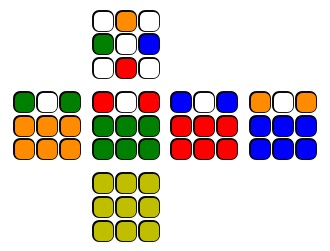

Key 19 of 321: 252111111353222222454333333151444444545153525666666666
S' U2 S U2 S' U' S2 R2 S' R2 (10 moves)
R2 S R2 S2 U' S U2 S' U2 S (10 moves)
(U2) S' U2 S U2 S' U S2 R2 S' R2 (10 moves)
(U2) R2 S R2 S2 U S U2 S' U2 S (10 moves)
(U2) S U2 S' U2 S U' S2 U2 R2 S R2 (11 moves)
R2 S' R2 U2 S2 U S' U2 S U2 S' (11 moves)
S U2 S' U2 S U S2 U2 R2 S R2 (11 moves)
(U2) R2 S' R2 U2 S2 U' S' U2 S U2 S' (11 moves)
(U2) S U2 S' U2 S U S' U2 S U2 S' (11 moves)
S U2 S' U2 S U' S' U2 S U2 S' (11 moves)
S' U2 S U2 S' U' S U2 S' U2 S (11 moves)
(U2) S' U2 S U2 S' U S U2 S' U2 S (11 moves)
S U S' R2 S' R2 U S' U2 S U' S (12 moves)
(U2) S' R2 S' R2 U2 S U' S U2 S' U2 S (12 moves)
S R2 S' R2 U2 S' U S U2 S' U2 S (12 moves)
(U2) S U' S' R2 S' R2 U' S' U2 S U S (12 moves)
S U2 S' U2 S U S R2 S' R2 U2 S' (12 moves)
(U2) S R2 S' R2 U2 S' U' S U2 S' U2 S (12 moves)
(U2) S' U S' U2 S U S' R2 S' R2 U S' (12 moves)
S' U' S' U2 S U R2 S R2 S U S' (12 moves)
(U2) S' U2 S U2 S' U' S U2 R2 S R2 S' (12 moves)
S U2 

In [79]:
i += 1
keys = list(LL2gen.keys())
key = keys[i]
cube = Cube()
cube.apply_moves(inverse_alg(LL2gen[key][0]))
cube.plot()
print(f"Key {i+1} of {len(keys)}: {key}")
for alg in LL2gen[key]:
    premove = 1 if "(" in alg else 0
    length = len(alg.split(" ")) - premove
    print(f"{alg} ({length} moves)")

In [222]:
def check_alg(alg, move_transition, start_grips = np.array([1])):
    arralg = alg_to_array(alg)
    
    # update the grips through move_transition
    # print the grip after each move
    grips = start_grips
    for move in arralg:
        grips = move_transition[grips, move]
        print(grips, array_to_alg([move]))


alg = "R' U2 R U R' U2 R U2 R' U2 R U' R' U' R U R' U' R"
check_alg(alg, move_transition_2gen, start_grips = np.array([1,2,3,4,5,6,7,8,9]))

[3 3 0 6 6 0 0 0 0] R'
[9 9 0 9 9 0 0 0 0] U2
[7 7 0 7 7 0 0 0 0] R
[4 4 0 4 4 0 0 0 0] U
[6 6 0 6 6 0 0 0 0] R'
[9 9 0 9 9 0 0 0 0] U2
[7 7 0 7 7 0 0 0 0] R
[1 1 0 1 1 0 0 0 0] U2
[3 3 0 3 3 0 0 0 0] R'
[9 9 0 9 9 0 0 0 0] U2
[7 7 0 7 7 0 0 0 0] R
[0 0 0 0 0 0 0 0 0] U'
[0 0 0 0 0 0 0 0 0] R'
[0 0 0 0 0 0 0 0 0] U'
[0 0 0 0 0 0 0 0 0] R
[0 0 0 0 0 0 0 0 0] U
[0 0 0 0 0 0 0 0 0] R'
[0 0 0 0 0 0 0 0 0] U'
[0 0 0 0 0 0 0 0 0] R


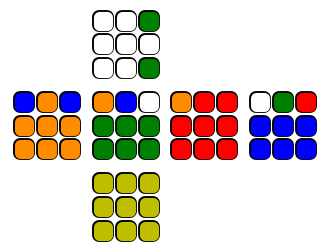

In [275]:
stringstate = "435111111422222222512333333343444444551555551666666666"
cube.state = np.array([int(i) for i in stringstate])
cube.plot()

# 2GLL + FR

In [3]:
move_transition_2gen = np.array([
#   [ 0, 1, 2, 3, 4, 5, 6, 7, 8, 9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44],
    [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#   [ R,R2,R', L,L2,L', r,r2,r', l,l2,l', M,M2,M', U,U2,U', D,D2,D', u,u2,u', d,d2,d', E,E2,E', F,F2,F', B,B2,B', f,f2,f', b,b2,b', S,S2,S'],
    [ 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
])

# move_transition_2gen = np.array([
# #   [ 0, 1, 2, 3, 4, 5, 6, 7, 8, 9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44],
#     [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
# #   [ R,R2,R', L,L2,L', r,r2,r', l,l2,l', M,M2,M', U,U2,U', D,D2,D', u,u2,u', d,d2,d', E,E2,E', F,F2,F', B,B2,B', f,f2,f', b,b2,b', S,S2,S'],
# 	# B
# 	[ 1, 2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # 1. After R
# 	[ 1, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # 2. After R2
# 	[ 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # 3. After R'
# 	# L
# 	[ 4, 5, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 7, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # 4. After R
# 	[ 4, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 8, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # 5. After R2
# 	[ 4, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 9, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # 6. After R'
# 	# F
# 	[ 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # 7. After R
# 	[ 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 2, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # 8. After R2
# 	[ 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 3, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # 9. After R'
# ])

length = 18
mode = "ZBLL+1E" # to get L5E solutions
start_grips = np.array([1,2,3,4,5,6,7,8,9])
skip_U = True
prnt = False
categorize = True
categorize_mode = "solved"
return_full_alg_list = False

LL_E_2gen = gen_full_algs(length=length, mode=mode, move_transition=move_transition_2gen, start_grips=start_grips, skip_U=skip_U, prnt=prnt, categorize=categorize, categorize_mode=categorize_mode, return_full_alg_list=return_full_alg_list)
print(len(LL_E_2gen))

--- Initiating alg genning up to length 18 ---
Parameters:
  - mode = ZBLL+1E
  - start_grips = 1, 2, 3, 4, 5, 6, 7, 8, 9
  - skip_U = True
  - prnt = False
--- Done generating algs ---
  - Total time spent: 3.20 seconds.
  - Alg count: 23774.
  - Example alg: R2 U' R2 U R U2 R U R' U R' U' R' U R U' R (17 moves)
--- Initiating alg categorization ---
--- Done categorizing algs ---
--- Statistics ---
  - Average alg length: 13.52 (3.69 variance)
  - Best case: 7 moves
  - Worst case: 17 moves
Further processing may be necessary.
409


In [49]:
i = -1
keys = list(LL_E_2gen.keys())
# sort keys by length of the first alg
def length_of_alg(key):
    alg = LL_E_2gen[key][0]
    l = len(alg.split(" "))
    l -= 1 if "(U" in alg else 0
    return l

keys = sorted(keys, key=length_of_alg)

In [40]:
i = -1
keys = list(LL_E_2gen.keys())
# sort keys by length of the first alg
def length_of_short_alg(key):
    alg = LL_E_2gen[key][0]
    alg = shorten_alg(alg, triggers)
    l = len(alg.split(" "))
    l -= 1 if "(U" in alg else 0
    return l

keys = sorted(keys, key=length_of_short_alg)

In [ ]:
i = -1
keys = list(LL_E_2gen.keys())
# sort keys by length of the first alg
def custom_sort(alg):
    alg = alg.split(") ")[-1]
    moves = alg.split(" ")
    score = 0
    for move in moves:
        if move in ["U", "U'", "R"]:
            score += 2
        if move in ["R'", "R2", "U2"]:
            score += 3
    return score

for key in keys:
    LL_E_2gen[key] = sorted(LL_E_2gen[key], key=custom_sort)

111111111222222222333333333444444444555555555666666666
111115111222222222343333333434444444555551555666666666
213111111445222222425333333135444444251555355666666666
515115111421322222222333333344444444515555351666666666
541111111521222222233333333514444444255555354666666666
335115111315422222425333333122444444211555554666666666
121111111242222222333333333414444444555555555666666666
425115111435122222145333333223444444352555511666666666
323111111414222222141333333232444444555555555666666666
243115111425122222435333333125444444251155355666666666
525115111145322222224333333511444444353555412666666666
132111111512222222325333333344444444455555551666666666
315115111334222222122333333542444444115555554666666666
522115111324122222531333333542444444453555115666666666
141115111222322222313333333424444444555551555666666666
315115111324422222132333333522444444155551554666666666
111111111242222222323333333434444444555555555666666666
224115111525422222432333333515444444151555313666666666
5331151115

In [26]:
def weighted_sum(array):
    # array contains 0s and 1s
    s = 0
    for i, j in enumerate(array):
        s += j*2**i
    return s

def sort_by_oll(key):
    alg = LL_E_2gen[key][0]
    if alg == "()":
        return 0
    cube = Cube("PLL")
    cube.apply_moves(inverse_alg(alg))
    cubestate = cube.state
    ids = [29,0,2,9,11,18,20,27]
    for i, id in enumerate(ids):
        ids[i] = int(cubestate[id]==5)
    # we want to rotate ids around by 2 and 2 until we get the smallest weighted sum
    minsum = weighted_sum(ids)
    for i in range(1, len(ids)//2):
        ids = ids[2:] + ids[:2]
        sum = weighted_sum(ids)
        if sum < minsum:
            minsum = sum

    return minsum

keys = sorted(keys, key=sort_by_oll)
i = 0

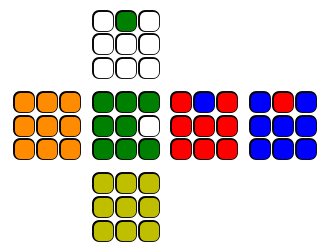

Key 12 of 409: 121115111222422222333333333414444444555555515666666666
(U') Ki' Ti' K R (9/4 moves)
Ko' K K P' U' R (11/6 moves)
(U) K K T Ki' R2 (11/5 moves)
(U2) P' U2 Pi' U' K Ko R (13/7 moves)
(U') Ko2 K K P' U' Ki R2 (13/7 moves)
(U2) K2 K T Ki' Ki' R' (13/6 moves)
(U) Ki Ki' Pi U P U2 R (13/7 moves)
(U2) Ko' K P' U' Pi' U2 R2 (13/7 moves)
K2 P U Ki' Ko' Ki R' (13/7 moves)
Ti' K P2 U' Ti' R (15/6 moves)
(U') Ti Ki' Pi2 U K K' R (15/7 moves)
Ko K' Ti' K K' Po' (15/6 moves)
(U') K K2 K K Ko' Ki' Ko' R' (15/8 moves)
(U') K2 K' K K P' U' Ko2 R' (15/8 moves)
(U) P' U' Ki' Ti' K Ko R' (15/7 moves)
(U') To Ki' Pi U K K' R2 (15/7 moves)
K' Ko' Ki' Ko K K2 P (15/7 moves)
K' K2 K K Ko' Ki' Ko R' (15/8 moves)
(U') K Ko' Ki' Ko K K2 P' (15/7 moves)
K2 Ko' Ti' K K' P2 (15/6 moves)
P' U2 K P U P2 U' R' (15/8 moves)
(U') P' U2 Ko K K' K Po2 (15/7 moves)
(U2) P U K2 P U Ki' Po' (15/7 moves)
(U') Pi2 U K P2 U' Pi' U2 R (15/8 moves)
Pi2 U' Ki' Pi2 U K K2 R (15/8 moves)
(U2) K' Ko Ki' Ki' Pi U Ki R' 

In [46]:
i += 1
key = keys[i]
cube = Cube()
cube.apply_moves(inverse_alg(LL_E_2gen[key][0]))
cube.plot()
print(f"Key {i} of {len(keys)}: {key}")
for alg in LL_E_2gen[key]:
    pre_move = 1 if "(" in alg else 0
    length_alg = len(alg.split(" ")) - pre_move 
    salg = shorten_alg(alg, triggers)
    length_salg = len(salg.split(" ")) - pre_move
    print(f"{salg} ({length_alg}/{length_salg} moves)")

In [30]:
# print average length of first alg
lengths = []
for key in keys:
    alg = LL_E_2gen[key][0]
    lengths.append(len(alg.split(" ")))
    if "(" in alg:
        lengths[-1] -= 1
avg_length = sum(lengths) / len(lengths)
print(avg_length)

# shortened
lengths = []
for key in keys:
    alg = LL_E_2gen[key][0]
    salg = shorten_alg(alg, triggers)
    lengths.append(len(salg.split(" ")))
    if "(" in alg:
        lengths[-1] -= 1
avg_length = sum(lengths) / len(lengths)
print(avg_length)

13.550122249388753
6.32518337408313


In [32]:
# print with tab so I can copy paste into excel
# 1st is the OLL type/case
# 2nd is skipped (so I can add an image)
# 3rd is the alg
# 4th is the short alg

for i, key in enumerate(keys):
    alg = LL_E_2gen[key][0].split(") ")[-1]
    salg = shorten_alg(alg, triggers)
    print(f"{alg}\t{salg}\t",len(alg.split(" ")) - int(")" in alg),"\t", len(salg.split(" ")) - int(")" in alg))

()	()	 0 	 0
R' U' R U' R2 U2 R2 U2 R2 U' R' U R	Pi' U' To2 Ko' Pi	 13 	 5
R2 U' R' U' R U R U R U' R	Ko' Ti' K K' R	 11 	 5
R' U' R U' R U R U' R' U R U R2 U' R'	Pi' U' K T' K Ko' R'	 15 	 7
R U' R' U R U R' U2 R U' R' U' R U' R'	T' P U2 P' U' P'	 15 	 6
R' U R' U' R' U' R' U R U R2	Ki Ki' Ki' Pi U R2	 11 	 6
R' U R U R2 U2 R2 U2 R2 U R' U' R	Pi U To2 Ko Pi'	 13 	 5
R' U' R' U' R2 U R U R	Ki' Ki' Ko K R	 9 	 5
R2 U2 R' U R U R U2 R U' R' U' R	Ko2 Pi U K2 P' U' R	 13 	 7
R U R' U2 R U' R' U' R U2 R'	P U2 P' U' P2	 11 	 5
R' U2 R U2 R2 U2 R2 U2 R U2 R	Ti2 To2 K2 R	 11 	 4
R' U' R' U' R' U R U R	Ki' Ki' Pi U R	 9 	 5
R' U' R' U' R U R U R	Ki' Ti' K R	 9 	 4
R U2 R' U R U R' U2 R U' R'	P2 U P U2 P'	 11 	 5
R U' R' U' R U2 R' U R U R'	P' U' P2 U P	 11 	 5
R2 U R U' R2 U' R U R' U R2 U R U' R2	Ko K' Ko' P U Ko K' R2	 15 	 8
R2 U2 R U2 R2 U2 R2 U2 R U2 R2	Ko2 K2 To2 K2 R2	 11 	 5
R2 U' R2 U2 R' U2 R' U2 R2 U R U2 R2	Po' U2 Ki2 Ki2 Ko K2 R2	 13 	 7
R U2 R U2 R' U' R U' R' U R' U' R U R'	K2 P2

In [47]:
first_algs = []
for key in keys:
    alg = LL_E_2gen[key][0].split(") ")[-1]
    first_algs.append(alg)

# for each alg, change it to a link format (so space becomes %20)
for alg in first_algs:
    alg = alg.replace(" ", "")
    print(f"=IMAGE(\"https://cube.rider.biz/visualcube.php?fmt=png&size=200&bg=t&view=plan&case={alg}\")")

=IMAGE("https://cube.rider.biz/visualcube.php?fmt=png&size=200&bg=t&view=plan&case=()")
=IMAGE("https://cube.rider.biz/visualcube.php?fmt=png&size=200&bg=t&view=plan&case=R'U'RU'R2U2R2U2R2U'R'UR")
=IMAGE("https://cube.rider.biz/visualcube.php?fmt=png&size=200&bg=t&view=plan&case=R2U'R'U'RURURU'R")
=IMAGE("https://cube.rider.biz/visualcube.php?fmt=png&size=200&bg=t&view=plan&case=R'U'RU'RURU'R'URUR2U'R'")
=IMAGE("https://cube.rider.biz/visualcube.php?fmt=png&size=200&bg=t&view=plan&case=RU'R'URUR'U2RU'R'U'RU'R'")
=IMAGE("https://cube.rider.biz/visualcube.php?fmt=png&size=200&bg=t&view=plan&case=R'UR'U'R'U'R'URUR2")
=IMAGE("https://cube.rider.biz/visualcube.php?fmt=png&size=200&bg=t&view=plan&case=R'URUR2U2R2U2R2UR'U'R")
=IMAGE("https://cube.rider.biz/visualcube.php?fmt=png&size=200&bg=t&view=plan&case=R'U'R'U'R2URUR")
=IMAGE("https://cube.rider.biz/visualcube.php?fmt=png&size=200&bg=t&view=plan&case=R2U2R'URURU2RU'R'U'R")
=IMAGE("https://cube.rider.biz/visualcube.php?fmt=png&size=200&bg

In [51]:
alg = "R' U2 R' U2 R2 U2 R2 U' R' U R"
salg = shorten_alg(alg, triggers)
print(salg)
alg = alg.replace(" ", "")
print(f"=IMAGE(\"https://cube.rider.biz/visualcube.php?fmt=png&size=200&bg=t&view=plan&case={alg}\")")

Ki2 Ki2 Po2 U' Pi
=IMAGE("https://cube.rider.biz/visualcube.php?fmt=png&size=200&bg=t&view=plan&case=R'U2R'U2R2U2R2U'R'UR")


Support algs imported!


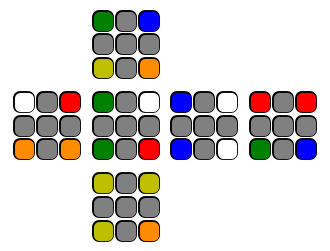

Cube initiated
       36 37 38
       39 40 41
       42 43 44
27 28 29  0 1 2  9 10 11  18 19 20
30 31 32  3 4 5  12 13 14  21 22 23
33 34 35  6 7 8  15 16 17  24 25 26
       45 46 47
       48 49 50
       51 52 53



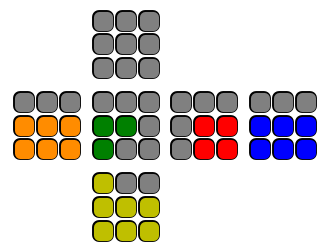

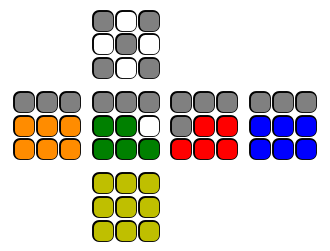

In [297]:
%run ../cube/Cube.ipynb # reload in case we changed the Cube class

cube = Cube("id")
print(cube)

mode = "FB+222RBD" # FB + 222 in BRD
cube = Cube(mode)
cube.plot()

mode = "ZBLL+1E" # L5E
cube = Cube(mode)
cube.plot()


# CPLL

In [92]:
move_transition_2gen = np.array([
#   [ 0, 1, 2, 3, 4, 5, 6, 7, 8, 9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44],
    [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#   [ R,R2,R', L,L2,L', r,r2,r', l,l2,l', M,M2,M', U,U2,U', D,D2,D', u,u2,u', d,d2,d', E,E2,E', F,F2,F', B,B2,B', f,f2,f', b,b2,b', S,S2,S'],
    [ 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1],
])

length = 16
mode = "LL" # to get L5E solutions
start_grips = np.array([1])
skip_U = True
prnt = True
categorize = True
categorize_mode = "solved"
return_full_alg_list = False

LL_E_2gen = gen_full_algs(length=length, mode=mode, move_transition=move_transition_2gen, start_grips=start_grips, skip_U=skip_U, prnt=prnt, categorize=categorize, categorize_mode=categorize_mode, return_full_alg_list=return_full_alg_list)
print(len(LL_E_2gen))

--- Initiating alg genning up to length 16 ---
Parameters:
  - mode = LL
  - start_grips = 1
  - skip_U = True
  - prnt = True
Genning search algs...
Algs of length 1 genned. Time spent: 0.00s...
Algs of length 2 genned. Time spent: 0.00s...
Algs of length 3 genned. Time spent: 0.00s...
Algs of length 4 genned. Time spent: 0.00s...
Algs of length 5 genned. Time spent: 0.01s...
Algs of length 6 genned. Time spent: 0.06s...
Algs of length 7 genned. Time spent: 0.39s...
Algs of length 8 genned. Time spent: 3.21s...
Done genning algs. Making into np array. Time spent: 3.21s
Genning table based on 14696157 algs...
1469615 (10.00%) algs added in 22.88 seconds...
2939230 (20.00%) algs added in 44.02 seconds...
4408845 (30.00%) algs added in 66.85 seconds...
5878460 (40.00%) algs added in 88.41 seconds...
7348075 (50.00%) algs added in 109.74 seconds...
8817690 (60.00%) algs added in 131.35 seconds...
10287305 (70.00%) algs added in 153.01 seconds...
11756920 (80.00%) algs added in 171.04 seco

In [94]:
i = -1
keys = list(LL_E_2gen.keys())
# sort keys by length of the first alg
def custom_sort(alg):
    alg = alg.split(") ")[-1]
    moves = alg.split(" ")
    score = 0
    for move in moves:
        if move in ["U", "U'", "R"]:
            score += 2
        if move in ["R'", "R2", "U2", "r", "r'", "S'"]:
            score += 3
        if move in ["r2", "S"]:
            score += 4
        if move in ["S2"]:
            score += 5

    return score

for key in keys:
    LL_E_2gen[key] = sorted(LL_E_2gen[key], key=custom_sort)

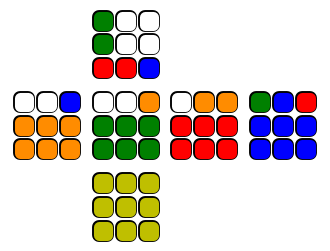

Key 1 of 648: 554111111544222222132333333553444444155155223666666666
r U2 R' U' R U' r' (7 moves)
R U S U R' U' R S' U' R' (10 moves)
R U2 r' U' R U r R' U2 R' (10 moves)
R U2 R' U2 r R' U R U' r' (10 moves)
R U2 R' U' S R U' R' U S' (10 moves)
R U2 r' U' R U' R' U2 r R' (10 moves)
(U) S R' U' R2 U R2 U' R' U S' (10 moves)
R U' R' U2 r U' r' U' r U r' (11 moves)
(U') S U' R U2 R' U' R U' R' U S' (11 moves)
R U' S' U' R' U' R U2 S U R' (11 moves)
(U) R' U' R2 U R S' R U' R' U' S (11 moves)
(U) S' U R U2 R' U' R U' R' U' S (11 moves)
(U) R2 S' R U' R2 U R2 U' R' U' S (11 moves)
R U2 r' U r U' r' U' r U2 R' (11 moves)
(U') r U r' U2 R U' R' U2 r U' r' (11 moves)
R U2 R' U S' U2 R U' R' U' S (11 moves)
r' S' r2 U2 R2 S' R U' R U' r' (11 moves)
(U) R' U' R2 U R' S R' U' R' U S' (11 moves)
(U') r U r' U2 r U2 R' U' R U2 r' (11 moves)
r2 R' U2 R' U2 r' R U R U' r' (11 moves)
r' R2 U2 R' U2 r2 R2 U R U' r' (11 moves)
R U2 R U2 r R' U2 R2 U' R U' r' (12 moves)
R U2 r' U' R U' R U2 r R' U2 R2 (1

In [96]:
i += 1
key = keys[i]
cube = Cube()
cube.apply_moves(inverse_alg(LL_E_2gen[key][0]))
cube.plot()
print(f"Key {i} of {len(keys)}: {key}")
for alg in LL_E_2gen[key]:
    pre_move = 1 if "(" in alg else 0
    length_alg = len(alg.split(" ")) - pre_move 
    print(f"{alg} ({length_alg} moves)")

In [97]:
tot_length = 0
for k in keys:
    alg = LL_E_2gen[k][0]
    pre_move = 1 if "(" in alg else 0
    length_alg = len(alg.split(" ")) - pre_move
    tot_length += length_alg

print(tot_length / len(keys))

13.526234567901234
